# Introducción a Julia
![MacDown logo](https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Julia_prog_language.svg/220px-Julia_prog_language.svg.png)

Para los que llevamos varios años desarrollando con diferentes lenguajes de programación, sabemos que existe la creencia de que es muy poco probable que exista un lenguaje dinámico y flexible como Python, y a la vez rápido y eficiente como C++. ¿Pero sí quizás esto fuera solo un mito?

Julia promete algo bastante desafiante *Looks like Python, feels like Lisp, runs like Fortran*(Se ve como Python, se siente como Lisp, y funciona como Fortran). 
Y como soy algo incrédulo quise llevarlo a la práctica para comprobar si esto es real. A continuación conoceremos las características principales de Julia junto a benchmarks contra C++1x, que es unos de los principales lenguajes para programación de alto rendimiento.

## Introducción a Julia

Julia es un lenguaje dinámico pero que fue diseñado con la eficiencia en mente a diferencia de otros como Python. Su enfoque principal es la computación científica, esto significa que fue diseñado para operaciones matemáticas, típicamente se refiere a computar operaciones intensivas de cálculo numérico(matrices, tensores, etc). Todo lo referente a trabajar con operaciones de álgebra lineal en Julia viene integrado de manera natural, un campo de principal interés seria Machine learning. 

Y claro, si un lenguaje promete eficiencia debe ser probado en entornos con paralelismo, Julia fue diseñado para trabajar sobre dichos entornos donde por defecto se necesita de paralelismo, para sacar el mayor provecho a todos los núcleos del cpu.

## Características básicas

Julia es un lenguaje JIT(just in time)[^jit] que le permite compilar en tiempo de ejecución, utiliza LLVM[^llvm] como plataforma de compilación. Esto le permite a Julia ser dinámico sin tener *un consumo excesivo de recursos* como los típicos lenguajes interpretados.

### Variables

Julia utiliza inferencia de tipos para declarar variables(también se puede asignar el tipo de dato de manera explicita, en algunos casos esto mejora la eficiencia), por ejemplo:


In [6]:
x = 10
typeof(x)

Int64

In [7]:
y = 10.1
y

10.1

Ahora veamos tipos de datos que son interesante para operaciones matemáticas, números racionales(forma de fracción) y complejos(con su parte real e imaginaria).

In [8]:
a = -2//5
typeof(a)

Rational{Int64}

In [9]:
b = 2.0 + 5im
typeof(b)

Complex{Float64}

El `im` se le agrega al final de un número para indicar que se trata de un número complejo.

En la siguiente imagen se aprecia el sistema de tipo numéricos de Julia, con sus jerarquías correspondiente, esto lo veremos más adelante en la sección *sistema de tipos*.

![number-type-system](number-type-system.png)

### Arreglos de multiples dimensiones

Una característica destacable de Julia es su manejo con estructuras de múltiples dimensiones, inspirado en lenguajes como Matlab y R es muy simple operar sobre dichas estructuras.

In [81]:
a = ones(10)


10-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [82]:
5a

10-element Array{Float64,1}:
 5.0
 5.0
 5.0
 5.0
 5.0
 5.0
 5.0
 5.0
 5.0
 5.0

In [12]:
5a .+ 1

5-element Array{Float64,1}:
 6.0
 6.0
 6.0
 6.0
 6.0

Algo interesante es que si se antepone un número antes de una variable, se multiplica, según el ejemplo anterior seria lo mismo que escribir `5*a`. Esto permite realizar ecuaciones de manera muy fácil(como veremos en la sección de funciones).

Al igual que con Matlab, en Julia se puede cambiar desde un vector columna a vector fila de manera muy simple con el carácter `'` al final de la variable.

In [13]:
v = [1,2,3,4,5]

5-element Array{Int64,1}:
 1
 2
 3
 4
 5

In [14]:
v'

1×5 LinearAlgebra.Adjoint{Int64,Array{Int64,1}}:
 1  2  3  4  5

Para los programadores de Python la compresión de listas es algo que entrega mucha simpleza y flexibilidad(sino se utiliza en exceso) en los programas, igual está incorporado en Julia.

In [79]:
a = [1:20;]

ErrorException: syntax: "1" is not a valid function argument name

In [16]:
[e+1 for e in a if e % 2 == 0] * 4

10-element Array{Int64,1}:
 12
 20
 28
 36
 44
 52
 60
 68
 76
 84

## Array

In [83]:
a = [1,2,3]
push!(a, 0)

a

4-element Array{Int64,1}:
 1
 2
 3
 0

In [18]:
display(last(a))

display(first(a))

a = [1,2,3]
b = a
push!(b, 4)

display(a)
a === b

0

1

4-element Array{Int64,1}:
 1
 2
 3
 4

true

## Diccionarios

In [19]:
d = Dict("abc" => 0, "ab" => -1, "a" => -2)
display(d)

Dict{String,Int64} with 3 entries:
  "abc" => 0
  "ab"  => -1
  "a"   => -2

### Funciones

Las funciones son un gran tema en Julia. A diferencia de Python no es necesario ni obligatorio la indentación, sino más bien todos los bloques de código tienen una clausula de cierre *end*. Por ejemplo veamos una simple función a continuación:

In [20]:
function max_number(a::Int64, b::Int64)
   if(a > b)
       println("a es $a, por lo tanto es mayor.")
   elseif(b > a)
       println("b es $b, por lo tanto es mayor.")
   else
       println("a y b son iguales")
   end
    
end

max_number (generic function with 1 method)

In [21]:
max_number(10, 5)

a es 10, por lo tanto es mayor.


Como se puede ver en el código superior, la función creada *max_number* tiene los argumentos con los tipos de datos declarados de manera explicita, lo cual es posible en Julia. Otro detalle es la interpolación en los string, algo similar ocurre en php[^inter-php] para incluir el valor de una variable dentro de un string anteponiendo el símbolo `$` antes del nombre de variable.

También es posible crear funciones en una sola linea de manera muy limpia.

In [22]:
f(x) = x^2

f (generic function with 1 method)

In [23]:
f(10)

100

Otro ejemplo de flexibilidad en la declaración de funciones, es cuando podemos declarar un retorno de múltiples elementos:

In [24]:
function multi_op(a, b)
    a * b, a / b, a % b, a ^ b
end

multi_op (generic function with 1 method)

In [25]:
@code_llvm multi_op(2, 3)



; Function multi_op
; Location: In[24]:2
define void @julia_multi_op_36198({ i64, double, i64, i64 }* noalias nocapture sret, i64, i64) {
top:
; Function rem; {
; Location: int.jl:233
  switch i64 %2, label %oksrem [
    i64 0, label %fail
    i64 -1, label %after_srem
  ]

fail:                                             ; preds = %top
  call void @jl_throw(%jl_value_t addrspace(12)* addrspacecast (%jl_value_t* inttoptr (i64 4505650288 to %jl_value_t*) to %jl_value_t addrspace(12)*))
  unreachable

oksrem:                                           ; preds = %top
  %3 = srem i64 %1, %2
  br label %after_srem

after_srem:                                       ; preds = %top, %oksrem
  %4 = phi i64 [ %3, %oksrem ], [ 0, %top ]
;}
; Function *; {
; Location: int.jl:54
  %5 = mul i64 %2, %1
;}
; Function /; {
; Location: int.jl:59
; Function float; {
; Location: float.jl:269
; Function Type; {
; Location: float.jl:254
; Function Type; {
; Location: float.jl:60
  %6 = sitofp i64 %1 to dou

En la función *multi_op* la última expresión `a * b, a / b, a % b, a ^ b` es una tupla con 4 elementos, y es valor inferido que retorna la función(sin necesidad de escribir el return), algo similar a como maneja *Scala* los valores de retorno. 

Julia permite pasar funciones como argumento de otra función(funciones de orden superior)[^fun-ord] como en lenguajes como Python y Haskell, además cada función en Julia es definida como genérica por defecto.

In [26]:
sum_number(n) = n > 1 ? sum_number(n-1) + n : n

sum_number (generic function with 1 method)

In [27]:
function test_sum(f, num)
  println(f(num))  
end

test_sum (generic function with 1 method)

In [28]:
value = test_sum(sum_number, 10)
value
typeof(test_sum)

55


typeof(test_sum)

Algo típico en lenguajes funcionales son las operaciones *map* y *filter*, estas son muy simple de utilizar en Julia:

In [29]:
a = [1:5;]

5-element Array{Int64,1}:
 1
 2
 3
 4
 5

In [30]:
map(n -> n + 1, a)   

5-element Array{Int64,1}:
 2
 3
 4
 5
 6

In [31]:
filter(x -> x % 2 == 0, a)
a

5-element Array{Int64,1}:
 1
 2
 3
 4
 5

Cabe señalar que las funciones que son parte de Julia y manipulan estructuras de datos son **inmutables**, entonces para el caso de `filter` y `map` si se quiere modificar los elementos se debe agregar el símbolo `!` al final de cada función. Por ejemplo:

In [32]:
filter!(x -> x % 2 == 0, a)


2-element Array{Int64,1}:
 2
 4

In [33]:
a

2-element Array{Int64,1}:
 2
 4

### Multiple Dispatch

Julia tiene una cualidad que lo diferencia de lenguaje como C, Python y Java(que son single dispatch[^single-dis]), y es que tiene lo que se llama *multiple dispatch*[^multiple-dis] algo similar a lo que conocemos como *métodos sobrecargados* en lenguajes orientados a objetos, pero en Julia tienen otro tipo de implementación y objetivo.

Esto permite definir una función con un mismo nombre pero con diferente tipos de datos en los argumentos(o cantidad), hasta aquí nada nuevo, pero Julia permite llamar una función desde múltiples lugares sin necesidad de tener un *solicitante* que en otros lenguajes se refiere a la instancia de un objeto, ejemplo `obj_inst.method()` esto provoca que una vez se llame y se ejecute el `method()` vuelve la referencia a la instancia `obj_inst`, esto en Julia no sucede, dado que posee lo que se conoce como *vtable*, una tabla virtual que contiene una lista de funciones con el mismo nombre, que se van añadiendo a medida se define una nueva función, veamos un ejemplo:

In [34]:
f(x) = x * 2

f (generic function with 1 method)

In [35]:
f2(x::Int, y::Int) = x + y
f2(x::Int, y::Float64) = x + y

f2 (generic function with 2 methods)

In [36]:
methods(f2)
println(f2(1,1))

println(f2(1,2.0))

2
3.0


In [37]:
f(10)

20

In [40]:
f2(10, 5)

15

La tabla virtual de `f` tiene dos valores con diferentes argumentos:

`f(x)` y `f(x, y)`

Cada función tiene una tabla asociada con las alternativas de argumentos que tiene dicha función, que se van eligiendo en tiempo de ejecución, sin necesidad de tener algo como un *tipo de instancia de clase* para mantener los métodos asociados a ella. La función **methods** nos permite conocer la lista de argumentos de una función.

Otro lenguaje que tiene *multiple dispatch* es Lisp[^julia-mast].  

### Meta-programación

#### Expresiones

La capacidad de definir expresiones es una característica que le da un gran poder a Julia. Por ejemplo si definimos una expresión `(1 + 3 * 5)`, con Julia debemos anteponer el signo `:` para que se asigne como expresión(tipo `Expr`) y no la ejecute:

In [41]:
a = :(1 + 3 * 5)

:(1 + 3 * 5)

In [42]:
typeof(a)

Expr

In [43]:
dump(a)

Expr
  head: Symbol call
  args: Array{Any}((3,))
    1: Symbol +
    2: Int64 1
    3: Expr
      head: Symbol call
      args: Array{Any}((3,))
        1: Symbol *
        2: Int64 3
        3: Int64 5


In [44]:
eval(a)

16

Como se puede apreciar en el código superior se utiliza la función `eval` para evaluar dicha expresión(algo similar a lo que tiene javascript). Otra forma de definir una expresión es utilizando un string como argumento de la función `parse`:

In [45]:
v = 10
e = Meta.parse("if(10 > $v)
                   println(10)
                  else
                   println(0)
                  end")

:(if 10 > 10
      #= none:2 =#
      println(10)
  else
      #= none:4 =#
      println(0)
  end)

In [46]:
eval(e)

0



Esta característica podría permitir crear *lenguajes de dominio especifico* dentro de Julia de una manera mucho más simple que con otros lenguajes, dado el soporte a *meta-programación* y al tener los tipo de datos `Expr` que permitiría crear nuevos tipos de expresiones dentro de Julia.



#### Macros

Las macros son algo muy poderoso que tiene Julia, y a diferencia de las funciones que utilizan valores como datos de entrada, las macros usan **expresiones**.

Las macros se define con una `@` previo al nombre, veamos algunas macros que vienen por defecto en Julia, primero definiremos una función `factorial`, y ocuparemos distintas macros para obtener información de la misma.

In [47]:
factorial(n::Int) = n > 0 ? factorial(n-1) * n : 1
factorial3(n) = n > 0 ? factorial3(n-1) * n : 1

factorial3 (generic function with 1 method)

In [48]:
a = ["a" 2]
function test(a) 
    
end
@code_warntype print(a) #Información del tiempo de ejecución.

Body::Nothing
│3 1 ─      (Core.typeassert)(Base.stdout, Base.IO)
│  │   %2 = π (Base.stdout, IO)
│  │   %3 = (getfield)(xs, 1)::Array{Any,2}
│  │   %4 = (Base.print)(%2, %3)::Core.Compiler.Const(nothing, false)
│  └──      return %4


In [49]:
@which factorial(20) #Estructura de la función.

factorial(n::Int64) in Main at In[47]:1

In [50]:
@code_native factorial(20) #Código nativo generado.

	.section	__TEXT,__text,regular,pure_instructions
; Function factorial {
; Location: In[47]:1
	pushl	%ebx
	decl	%eax
	movl	%edi, %ebx
; Function >; {
; Location: operators.jl:286
; Function <; {
; Location: int.jl:49
	decl	%eax
	testl	%ebx, %ebx
;}}
	jle	L31
; Function -; {
; Location: int.jl:52
	decl	%eax
	leal	-1(%ebx), %edi
;}
	decl	%eax
	movl	$554730576, %eax        ## imm = 0x21108450
	addl	%eax, (%eax)
	addb	%al, (%eax)
	calll	*%eax
; Function *; {
; Location: int.jl:54
	decl	%eax
	imull	%ebx, %eax
;}
	popl	%ebx
	retl
L31:
	movl	$1, %eax
	popl	%ebx
	retl
	nopw	%cs:(%eax,%eax)
;}


In [51]:
@code_llvm 1+1 #Código LLVM generado.


; Function +
; Location: int.jl:53
define i64 @"julia_+_32037"(i64, i64) {
top:
  %2 = add i64 %1, %0
  ret i64 %2
}


Las macros `@code_native` y `@code_llvm` son muy útiles en caso de querer optimizar el código y tener control sobre lo que Julia esta generando[^julia-high]. La primera permite visualizar el código nativo que genera el código de Julia, y la segunda el código que LLVM esta generando. 

Julia también permite crear nuevas macros personalizadas, supongamos que queremos crear la macro `@special_print` que lo único que hace es recibir una expresión y antes de ejecutarla imprime `begin` y en el termino `end`, la expresión está definida dentro de un bloque `quote`, este bloque permite definir expresiones en multiples lineas:


In [52]:
macro special_print(ex)
         return quote
           println("begin")
           local val = $ex
           println("\nend")
           val
         end
       end

@special_print (macro with 1 method)

In [53]:
@special_print println("hello") 

begin
hello

end


Una representación visual de esta macro:

![macro-expr](macro-expr.png)

Esto al igual como mencionamos en el apartado anterior de expresiones, da una gran flexibilidad de Julia, donde utiliza el concepto de *Homoiconicidad* [^homoiconicidad] para poder utilizar macros, trata básicamente que un bloque de código también representa una estructura de datos con tipos de datos primarios del lenguaje en si mismo, o sea la **habilidad de extender el propio lenguaje**.



## Características Avanzadas

### Paralelismo

Julia tiene como fortaleza manejar paralelismo en entornos distribuidos. Al igual que lenguajes como Erlang, Dart, y Elixir, Julia usa un patrón de mensajería entre procesos[^juliadoc], los cuales puede ser locales o remotos.

En Julia estos procesos son llamados *workers* y se pueden iniciar con dicho entorno solo abriendo la REPL, `julia -p n` donde n es número de workers a crear. Estos workers son procesos independientes(no thread), por lo cual la memoria no es compartida. Generalmente este `n` hace referencia a los números de núcleos del cpu que quieres utilizar.


Cada workers se comunica y se ejecuta a través del protocolo TCP a nivel local. Para ejecutar Julia en un *cluster*, se debe hacer utilizar el siguiente comando `julia --machinefile machines test.jl` donde `--machinefile machines` es el archivo que contiene los nombres de los computadores distribuidos(nodos), y `test.jl` es el script que realiza el cálculo.

Para hacer ciclos paralelos en Julia se debe utilizar el macro `@parallel` antes del for, y `(+)` que hace referencia a una reducción. 

En el siguiente ejemplo se crea un vector columna de una dimensión, con `5x10^10` elementos donde existen dos funciones, las cuales acumularan los datos en simples operaciones matemáticas, una en paralelo y la otra no. Para esto ocuparemos un servidor con las siguientes características:


```
Architecture:          x86_64
CPU op-mode(s):        32-bit, 64-bit
Byte Order:            Little Endian
CPU(s):                16
On-line CPU(s) list:   0-15
Thread(s) per core:    1
Core(s) per socket:    16
Socket(s):             1
NUMA node(s):          1
Vendor ID:             GenuineIntel
CPU family:            6
Model:                 79
Model name:            Intel(R) Xeon(R) CPU E5-2673 v4 @ 2.30GHz
Stepping:              1
CPU MHz:               2294.687
BogoMIPS:              4589.37
Hypervisor vendor:     Microsoft
Virtualization type:   full
L1d cache:             32K
L1i cache:             32K
L2 cache:              256K
L3 cache:              51200K
NUMA node0 CPU(s):     0-15
```
Utilizaremos el package `BenchmarkTools`, que sirve para hacer benchmark sobre una función utilizando la macro `@btime`, ejecutándola varias veces y sacando el promedio del tiempo de ejecución(esto hace más preciso el benchmark).

In [54]:
using BenchmarkTools, Compat
using Distributed, SharedArrays

function getdata(mode)
    if mode == "parallel"
        data = SharedArray{Float64, 1}(50000)
        @distributed for i in 1:length(data)
            data[i] = i / 10.0
        end
    elseif mode == "no-parallel"
        data = rand(50000)
        for i in 1:length(data)
            data[i] = i / 10.0
        end
    end
    data
end

function parallel(data)
    acum =  @distributed (+) for i = 1:length(data)
        data[i] +  2 * sqrt(i) / 10.0
    end
end

function no_parallel(data)
    acum::Float64 = 0.0
    for i = 1:length(data)
       acum = acum + data[i] + 2 * sqrt(i) / 10.0
    end
    acum
end

rmprocs(workers())

addprocs(4)
print(nprocs())

#@btime parallel(getdata("parallel"))
#@btime no_parallel(getdata("no-parallel"))
versioninfo()



5Julia Version 1.0.2
Commit d789231e99 (2018-11-08 20:11 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin14.5.0)
  CPU: Intel(R) Core(TM) i5-6267U CPU @ 2.90GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.0 (ORCJIT, skylake)



Resultados del bechmark entre la función `parallel(data)` y `no_parallel(data)`, demuestra lo esperado que la versión paralela sea más rápida, también cabe señalar que en el caso de la función `getdata(mode)` la versión paralela es muy superior en tiempo de ejecución, esto porque usa una estructura de dato `SharedArray` diseñada para trabajar en entorno de múltiples procesos de memoria compartida, como sucede en este caso. Los resultados:
```
cc@vm-app3:~/test_julia$ julia -p 16 --optimize=3 --compile=yes --precompiled=yes test.jl parallel
 1.573 s (2398 allocations: 194.28 KiB)
   
cc@vm-app3:~/test_julia$ julia --optimize=3 --compile=yes --precompiled=yes test.jl no-parallel
  2.454 s (0 allocations: 0 bytes)
```


### Sistema de Tipos

Después de ver algunas características de Julia, podemos apreciar que el sistema de tipo es muy relevante, nos permite bastante flexibilidad al momento de programar. 

Para encapsular variables existen las `struct`, las cuales nos da la posibilidad de agregar restricciones de tipos al momento de crear el objeto:

In [55]:
struct Test
      x::Int
      y::Int
      z::Int
  end

In [57]:
t = Test(1, 2, 30.01)

InexactError: InexactError: Int64(Int64, 30.01)

In [58]:
t = Test(1, 2, 3.5) #Se intenta ingresar un valor Float.

InexactError: InexactError: Int64(Int64, 3.5)

In [59]:
t = Test(1, 2, "hi") #Se intenta ingresar un valor String.

MethodError: MethodError: Cannot `convert` an object of type String to an object of type Int64
Closest candidates are:
  convert(::Type{T<:Number}, !Matched::T<:Number) where T<:Number at number.jl:6
  convert(::Type{T<:Number}, !Matched::Number) where T<:Number at number.jl:7
  convert(::Type{T<:Integer}, !Matched::Ptr) where T<:Integer at pointer.jl:23
  ...

Como se puede apreciar en el ejemplo anterior, el compilador reclama cuando se intenta violar una restricción de tipo. 

Otro dato interesante es que se pueda obtener la información de los atributos de una `struct` con la función `fieldnames`:

In [60]:
t = Test(1, 2, 3)

Test(1, 2, 3)

In [61]:
fieldnames(Test)

(:x, :y, :z)

In [62]:
t.x, t.y, t.z

(1, 2, 3)

También se puede definir una `struct` con *tipos compuestos paramétrico*, algo probablemente similar a lo que se conoce como *programación genérica*:

In [63]:
struct Pair2{T}
  p1::T
  p2::T
end

In [64]:
Pair2(1,2)

Pair2{Int64}(1, 2)

In [65]:
Pair2(1,2.0)

MethodError: MethodError: no method matching Pair2(::Int64, ::Float64)
Closest candidates are:
  Pair2(::T, !Matched::T) where T at In[63]:2

Una `struct` puede tener múltiples tipos paramétrico:

In [66]:
struct Pair3{T, T2}
  p1::T
  p2::T2
end

In [67]:
Pair3(1, "hi")

Pair3{Int64,String}(1, "hi")

Ahora para crear una restricción desde un sub-tipo, se puede crear un `abstract type` para definir un nuevo tipo `abstract type Point{T<:Real, T2<:Real} end` donde el símbolo `<:` significa `T es sub-tipo de Real`, entonces cualquier estructura que implemente `Point` podrá solo inicializarse con valores que sea sub-tipo de `Real`, por ejemplo:


In [68]:
abstract type Point{T<:Real, T2<:Real} end
String <: Real

false

In [69]:
struct Pair_A{T, T2} <: Point{T, T2}
   x::T
   y::T2
end


In [70]:
Int <: Real

true

In [71]:
Pair_A(1, 2)

Pair_A{Int64,Int64}(1, 2)

In [96]:
Pair_A("hi", 2)

TypeError: TypeError: in Point, in T, expected T<:Real, got Type{String}

En el código superior ocurre un error al intentar crear un objeto `Pair` con una variable del tipo `String`, dado que `String <: Real` es falso, porque `String` no es sub-tipo de `Real`.

## Benchmark - Julia vs C++1x

### Multiplicación de Matrices

El siguiente benchmark(prueba de rendimiento) multiplicaremos dos matrices de `2000x2000` que contienen valores `Ìnt64`, este es un ejemplo típico para comprobar la velocidad de computo entre diferentes lenguajes, no utilizaremos bibliotecas externas.

### Un nucleo 

*	En C++ usaremos `gcc 4.6` con optimización en la compilación(`-O3`). 
*	En Julia usaremos la versión 0.6.2 del lenguaje.

#### C++

Compilación: 

- `g++  -std=c++11 -O3 -o mult_matrix mult_matrix.cpp`
- `time ./mult_matrix`

```
//Archivo: mult_matrix.cpp

#include <iostream>
#include <vector>

using namespace std;

int main(){

    int const size = 2000;
    vector<vector<int>> matrix1(size, vector<int>(size));
    vector<vector<int>> matrix2(size, vector<int>(size));
    vector<vector<int>> matrix3(size, vector<int>(size));

    for (int i = 0; i < size; i++)
    {
       for (int j = 0; j < size; j++)
       {
            matrix1[i][j] = i+j;
            matrix2[i][j] = i-j;
       }
    }
    for (int i = 0; i < size; i++)
    {
       for (int j = 0; j < size; j++)
       {
          matrix3[i][j] = 0;
          for (int k = 0; k < size; k++)
          	matrix3[i][j] += matrix1[i][k] * matrix2[k][j];
       }
	}
}
```

#### Julia

Compilación: 

- `time julia mult_matrix.jl`

```
#Archivo mult_matrix.jl

function calculation(size::Int64)
    matrix1 = zeros(Int, size, size)
    matrix2 = zeros(Int, size, size)
    matrix3 = zeros(Int, size, size)
    for i in 1:size
	    @inbounds for j in 1:size
            matrix1[i,j] = i+j
            matrix2[i,j] = i-j
	    end
    end
    for i in 1:size
        for j in 1:size
            matrix3[i,j] = 0
            @inbounds for k in 1:size
                matrix3[i,j] += matrix1[i,k] * matrix2[k,j]
            end
        end
    end
end

calculation(2000)
```

Algunas cosas interesante del código de Julia es que utilizando la macro `@inbounds` le decíamos al compilador que no realice comprobaciones en el indices de los arreglos, por ende el código assembly generado es menor(esto lo puedes comprobar con la macro `@code_native`), claramente se debe utilizar con cuidado. Por otra parte la función `zeros(:type, :row_dim, :col_dim)`, nos permite crear una matriz con un tipo de dato especifico y con el tamaño de la misma.

#### Resultados

| Lenguaje          |Tiempo(segundos)|
| ----------------- |:--------------:|
| C++/gcc 4.6			|33.252 		  	| 
| Julia 0.6.2       |16.059         	| 

![benchmark no-paralelo](benchmark-no-paralelo.png)

### Multiples núcleos


Para esto, usaremos C++ con OpenMP(una biblioteca para paralelismo de memoria compartida)[^openmp] y al igual que la prueba anterior Julia 0.6.2, el servidor de prueba es el mismo que mencionamos previamente en la sección de **paralelismo**, un servidor Intel(R) Xeon(R) de 16 núcleos cpu.

#### C++

Compilación: 

- `g++ -fopenmp -std=c++11 -O3 -o mult_matrix_parallel mult_matrix_parallel.cpp`

```
//Archivo: mult_matrix_parallel.cpp
#include <iostream>
#include <vector>

using namespace std;

int main(){

	int const size = 2000;
	vector<vector<long>> Mat1(size, vector<long>(size));
	vector<vector<long>> Mat2(size, vector<long>(size));
	vector<vector<long>> Mat3(size, vector<long>(size));

	#pragma omp parallel
	{
		#pragma omp for
		for (int i = 0; i < size; i++)
	   	{
       	for (int j = 0; j < size; j++)
	       {
				Mat1[i][j] = (i+j)+2;
				Mat2[i][j] = (i-j)+2;
		   }
		}
		#pragma omp for
		for (int i = 0; i < size; i++)
		{
		   for (int j = 0; j < size; j++)
		   {
		      Mat3[i][j] = 0;
		      for (int k = 0; k < size; k++)
		      		Mat3[i][j] += Mat1[i][k] * Mat2[k][j];
			}
		}
	}
}
```

#### Julia

Compilación: 

- `julia -p 16 -O3 mult_matrix_parallel.jl`

```
#//Archivo: mult_matrix_parallel.jl
using BenchmarkTools, Compat

function calculation(size::Int64)

	matrix1 = SharedArray{Int, 2}(size, size)
	matrix2 = SharedArray{Int, 2}(size, size)
	matrix3 = SharedArray{Int, 2}(size, size)

	@sync @parallel for i in 1:size
		@inbounds for j in 1:size
			matrix1[i,j] = i+j
			matrix2[i,j] = i-j
		end
	end
	@sync @parallel for i in 1:size
	   for j in 1:size
	   		matrix3[i,j] = 0
	        @inbounds for k in 1:size
            	matrix3[i,j] += matrix1[i,k] * matrix2[k,j]
	    	end
	    end
	end
end

size = 2000
@btime calculation(size)
```

Algo importante a mencionar del código superior de Julia, es que se agrega la macro `@sync` previo al `@parallel` para obligar a esperar que se termine todo el computo en paralelo para continuar al siguiente bloque.

### Resultados

| Lenguaje          |Tiempo(segundos)|
| ----------------- |:--------------:|
| C++/openmp/gcc 4.6|3.600		    	| 
| Julia 0.6         |5.938          	| 

![benchmark paralelo](benchmark-paralelo.png)


C++ y OpenMP superan a Julia en esta prueba, ahora, **no deja de ser sorprendente que la diferencia no es tan grande**. 

**Nota:** En el caso de C++/OpenMP probablemente exista una manera de hacer más eficiente el código.

## Conclusión

Julia representa una interesante propuesta para todo lo referente a ciencia de datos, y a pesar de que es nuevo(aún no esta en su versión 1.0), no deja de sorprender el rendimiento comparado a C++. A pesar de eso, C++ es un lenguaje para el  desarrollo de sistemas(bajo nivel y de alto rendimiento), y Julia no esta enfocado en competir en esa área, sino más bien en todo lo referente al análisis de datos.

Para terminar, dejo algunas ventajas y desventajas que encontré del lenguaje:

### Ventajas

*	Posee las ventajas de un lenguaje dinámico con la velocidad de computo de un lenguaje compilado.
*  Interesante sistema de tipos y meta-programación.
* 	Incorpora facilidades para manejar operaciones matemáticas, lo cual permite una fácil adopción para *científicos de datos*, sin sacrificar la velocidad de computo.

### Desventajas

*	Comparado a C++ ocupa más ram, casi el doble en algunos casos. Esto podría ser un problema si se quiere utilizar Julia en sistemas embebidos(empíricamente no lo comprobé).
* 	La comunidad es aún pequeña si le compara a lenguajes ya establecidos como Python. Esto podria ser solo una desventaja temporal.
*  El sistema de instalación de paquetes aún no es robusto como otros, tales como `pip` y `npm`.



## Referencias

[^julia-high]: [Julia: High Performance Programming. Ivo Balbaert, Avik Sengupta, Malcolm Sherrington](https://www.amazon.com/Julia-Performance-Programming-Ivo-Balbaert-ebook/dp/B01MXS4IPT)

[^julia-mast]: [Mastering Julia. Malcolm Sherrington](https://www.amazon.com/Mastering-Julia-Contemporary-Challenges-Programming-ebook/dp/B010T266RY/ref=sr_1_1?s=digital-text&ie=UTF8&qid=1521246511&sr=1-1&keywords=mastering+julia)
[^homoiconicidad]: [https://es.wikipedia.org/wiki/Homoiconicidad]()
[^openmp]: [What is OpenMP?](https://www.dartmouth.edu/~rc/classes/intro_openmp)
[^juliadoc]:	[https://docs.julialang.org/en/stable/manual/parallel-computing]()
[^jit]: [https://es.wikipedia.org/wiki/M%C3%A9todo_justo_a_tiempo]()
[^llvm]: [https://es.wikipedia.org/wiki/LLVM]()
[^inter-php]: [http://php.net/manual/es/language.types.string.php]()
[^fun-ord]: [https://es.wikipedia.org/wiki/Funci%C3%B3n_de_orden_superior]()
[^single-dis]: [https://en.wikipedia.org/wiki/Dynamic_dispatch#Single_and_multiple_dispatch]()
[^multiple-dis]: [https://en.wikipedia.org/wiki/Multiple_dispatch]()



In [72]:
import Pkg
Pkg.add("Plots")

  Updating registry at `~/.julia/registries/General`


┌ Warning: Some registries failed to update:
│     — `~/.julia/registries/General` — registry dirty
└ @ Pkg.API /Users/osx/buildbot/slave/package_osx64/build/usr/share/julia/stdlib/v1.0/Pkg/src/API.jl:157


 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


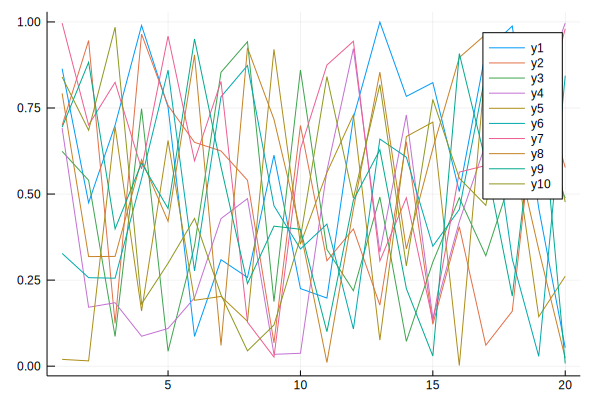

In [76]:
using Plots
gr()
plot(rand(20, 10))

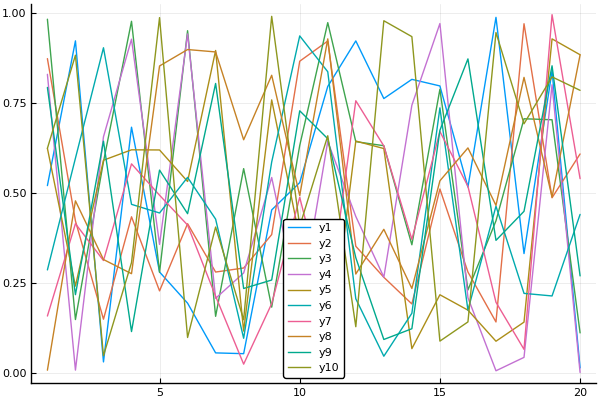

In [77]:

pyplot() # based on matplotlib
plot(rand(20, 10))

In [75]:
plotly() # api to plot.ly
plot(rand(20, 10))